**PROBLEM STATEMENT**

You are the Data Scientist at a telecom company “Neo” whose customers are churning out to
its competitors. You have to analyse the data of your company and find insights and stop your
customers from churning out to other telecom companies.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("drive/MyDrive/customer_churn.csv")

In [6]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.shape

(7043, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
for col in df.columns:
    print(pd.DataFrame(df[col].value_counts()))

            customerID
7590-VHVEG           1
3791-LGQCY           1
6008-NAIXK           1
5956-YHHRX           1
5365-LLFYV           1
...                ...
9796-MVYXX           1
2637-FKFSY           1
1552-AAGRX           1
4304-TSPVK           1
3186-AJIEK           1

[7043 rows x 1 columns]
        gender
Male      3555
Female    3488
   SeniorCitizen
0           5901
1           1142
     Partner
No      3641
Yes     3402
     Dependents
No         4933
Yes        2110
    tenure
1      613
72     362
2      238
3      200
4      176
..     ...
28      57
39      56
44      51
36      50
0       11

[73 rows x 1 columns]
     PhoneService
Yes          6361
No            682
                  MultipleLines
No                         3390
Yes                        2971
No phone service            682
             InternetService
Fiber optic             3096
DSL                     2421
No                      1526
                     OnlineSecurity
No                         

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [12]:
df.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [16]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [17]:
df.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

A) Data Manipulation:

a. Extract the 5th column & store it in ‘customer_5’

In [18]:
customer_5 = df.iloc[:,4]

In [19]:
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [20]:
customer_5 = df.loc[:,["Dependents"]]

In [21]:
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


b. Extract the 15th column & store it in ‘customer_15’

In [22]:
customer_15 = df.iloc[:,14]

In [23]:
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [24]:
customer_15 = df.loc[:,["StreamingMovies"]]  # [rows:rows, col:col]

In [25]:
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’

In [26]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [27]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [28]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [29]:
senior_male_electronic = df[(df["gender"]=="Male") & (df["SeniorCitizen"]==1) & (df["PaymentMethod"]=="Electronic check")]

In [30]:
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

In [31]:
customer_total_tenure = df[(df["tenure"]>70) | (df["MonthlyCharges"]>100)]

In [32]:
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

In [33]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [34]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [35]:
two_mail_yes = df[(df["Contract"] == "Two year") & (df["PaymentMethod"] == "Mailed check") & (df["Churn"] == "Yes")]

In [36]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


f. Extract 333 random records from the customer_churndataframe& store the result in ‘customer_333’

In [37]:
customer_333 = df.sample(n=333)

In [38]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4210,5446-DKWYW,Female,1,Yes,Yes,61,Yes,Yes,DSL,No,...,Yes,No,Yes,No,One year,Yes,Electronic check,65.20,3965.05,No
6719,2509-TFPJU,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.75,1864.2,No
4147,3836-FZSDJ,Male,1,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),24.85,1901,No
5936,9418-RUKPH,Female,0,Yes,Yes,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.95,756.4,No
1085,4441-NIHPT,Female,1,No,No,13,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,74.30,940.35,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,6164-HAQTX,Male,0,No,No,71,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),53.95,3888.65,No
5221,5336-UFNZP,Female,1,Yes,Yes,65,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,107.45,7047.5,No
5446,6141-OOXUQ,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.65,19.65,Yes
3670,5442-BXVND,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.25,838.5,No


In [39]:

df["MonthlyCharges"].sample(n=10)

4537    49.80
1572    45.00
1286    74.10
3770    19.90
282     25.40
5110    73.50
857     50.80
115     89.85
2970    70.25
3880    82.00
Name: MonthlyCharges, dtype: float64

g. Get the count of different levels from the ‘Churn’ column

In [40]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**B) Data Visualization:**

a. Build a bar-plot for the ’InternetService’ column:

i. Set x-axis label to ‘Categories of Internet Service’.

ii. Set y-axis label to ‘Count of Categories’.

iii. Set the title of plot to be ‘Distribution of Internet Service’.

iv. Set the color of the bars to be ‘orange’.

In [41]:
x = df["InternetService"].value_counts().keys().tolist()

In [42]:
x

['Fiber optic', 'DSL', 'No']

In [43]:
y = df["InternetService"].value_counts().tolist()

In [44]:
y

[3096, 2421, 1526]

In [45]:
sns.barplot(x,y,color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

b. Build a histogram for the ‘tenure’ column:

i. Set the number of bins to be 30

ii. Set the color of the bins to be ‘green’

iii. Assign the title ‘Distribution of tenure’

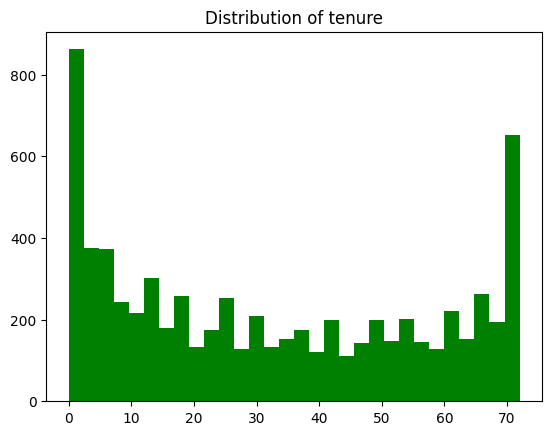

In [46]:
plt.hist(df["tenure"],color="green",bins=30)
plt.title("Distribution of tenure")
plt.show()

c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:

i. Assign the points a color of ‘brown’

ii. Set the x-axis label to ‘Tenure of customer’

iii. Set the y-axis label to ‘Monthly Charges of customer’

iv. Set the title to ‘Tenure vs Monthly Charges’

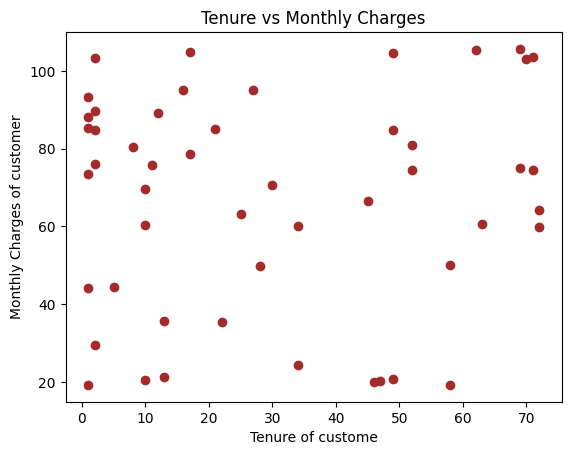

In [47]:
plt.scatter(x = df["tenure"].head(50),y=df["MonthlyCharges"].tail(50),color="brown")
plt.xlabel("Tenure of custome")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.show()

d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.

<Axes: xlabel='Contract', ylabel='tenure'>

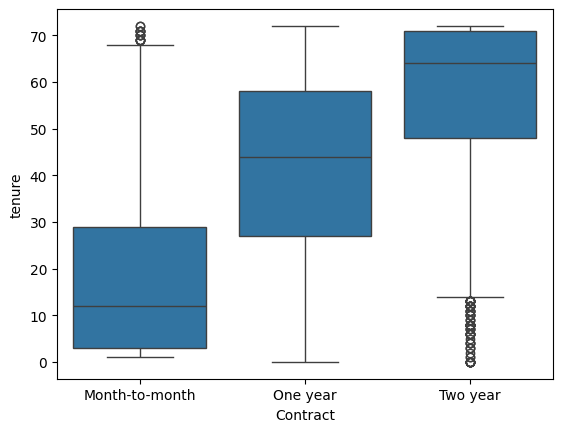

In [48]:
sns.boxplot(x = df["Contract"], y = df["tenure"])

**C) Linear Regression:**


a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

i. Divide the dataset into train and test sets in 70:30 ratio.

ii. Build the model on train set and predict the values on test set

iii. After predicting the values, find the root mean square error

iv. Find out the error in prediction & store the result in ‘error’

v. Find the root mean square error

In [49]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [50]:
x = df.loc[:,["tenure"]].values

In [51]:
x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]])

In [52]:
y = df.loc[:,["MonthlyCharges"]].values

In [53]:
y

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [55]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)    #training the model

LinearRegression()

In [56]:
y_pred = lin_reg.predict(x_test)

In [57]:
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
mse = mean_squared_error(y_test,y_pred)

In [60]:
mse

864.0415701364655

In [61]:
rmse = np.sqrt(mse)

In [62]:
rmse

29.394584027273893

**D) Logistic Regression:**

a. Build a simple logistic regression model where dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’

i. Divide the dataset in 65:35 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [63]:

x = df.loc[:,["MonthlyCharges"]].values

In [64]:
y = df.loc[:,["Churn"]].values

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=0)

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [67]:
y_pred = log_reg.predict(x_test)

In [68]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [70]:
confusion_matrix(y_test,y_pred)

array([[1815,    0],
       [ 651,    0]])

In [71]:
accuracy_score(y_test,y_pred)

0.7360097323600974

b. Build a multiple logistic regression model where dependent variable is ‘Churn’ & independent variables are ‘tenure’ & ‘MonthlyCharges’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

 iii. Build the confusion matrix and get the accuracy score

In [72]:
x = df.loc[:,["MonthlyCharges","tenure"]]
y = df.loc[:,["Churn"]]

In [73]:
x_train, x_test , y_train , y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [75]:
y_pred = logreg.predict(x_test)

In [76]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
confusion_matrix(y_pred,y_test)

array([[934, 212],
       [107, 156]])

In [79]:
accuracy_score(y_pred,y_test)

0.7735982966643009

**E) Decision Tree:**

a. Build a decision tree model where dependent variable is ‘Churn’ & independent
variable is ‘tenure’

i. Divide the dataset in 80:20 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

In [80]:
x = df.loc[:,["tenure"]]

In [81]:

y = df.loc[:,["Churn"]]

In [82]:
x_train, x_test , y_train , y_test=train_test_split(x,y,test_size=0.20)

In [83]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [84]:
y_pred = dec_tree.predict(x_test)

In [85]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred,y_test))
print("Accuracy is:",accuracy_score(y_pred,y_test))


[[1352  323]
 [ 208  230]]
0.7486985328916232


In [87]:
print(accuracy_score(y_pred,y_test))

0.758694109297374


**F) Random Forest:**

a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
variables are ‘tenure’ and ‘MonthlyCharges’

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

In [88]:
x = df.loc[:,['tenure','MonthlyCharges']]
y = df.loc[:,['Churn']]

In [89]:
x_train, x_test , y_train , y_test=train_test_split(x,y,test_size=0.30, random_state = 0)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rndfrst = RandomForestClassifier(n_estimators=200) #no.of decision trees
rndfrst.fit(x_train, y_train)

<ipython-input-90-0369ff4cf76c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rndfrst.fit(x_train, y_train)


RandomForestClassifier(n_estimators=200)

In [91]:
y_pred = rndfrst.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[1352  323]
 [ 208  230]]
0.7486985328916232


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-95-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

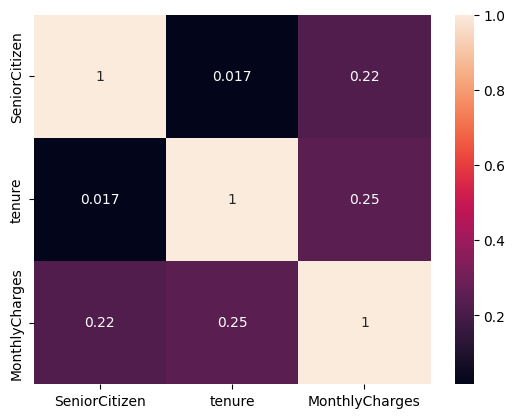

In [95]:
sns.heatmap(df.corr(),annot=True)